# Machine Learning Project

##### Imports

In [1]:
%pylab inline
import scipy.io as sio
from sklearn.neighbors import NearestNeighbors
from sklearn import svm, grid_search, tree
from sklearn.cross_validation import cross_val_predict, cross_val_score
from sklearn.cross_validation import train_test_split
from sklearn.metrics import confusion_matrix

Populating the interactive namespace from numpy and matplotlib


##### Load Data

In [2]:
subnum = 2

In [3]:
data = sio.loadmat("s"+str(subnum)+"_matfile.mat")

In [4]:
data.keys()

['__header__',
 '__globals__',
 'respy',
 'respx',
 '__version__',
 'goalx',
 'goaly']

##### Define some variables

In [5]:
gX, gY, rX, rY = data["goalx"], data["goaly"], data["respx"], data["respy"]

In [6]:
tmpY = gX + gY
mapper = {val: i for i, val in enumerate(sorted(list(set(tmpY[:,0]))))}
print "mapping is", mapper
y = [mapper[Y] for Y in tmpY[:,0]] 
X = np.hstack((rX, rY))

mapping is {2314: 1, 2548: 2, 1791: 0}


In [7]:
np.hstack((gX,gY,tmpY))[:10]

array([[2254,  294, 2548],
       [2254,  294, 2548],
       [1763,  551, 2314],
       [1763,  551, 2314],
       [2254,  294, 2548],
       [1763,  551, 2314],
       [2254,  294, 2548],
       [1089,  702, 1791],
       [1763,  551, 2314],
       [2254,  294, 2548]], dtype=uint16)

In [8]:
vowel_mapper = {1791: "aah", 2548: "ee", 2314: "eh"}

##### Define an SVM and grid search over parameters in a cross validation

the predicted y is the cross-validated y

In [9]:
parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}
svr = svm.SVC()
clf = grid_search.GridSearchCV(svr, parameters)
y_pred = cross_val_predict(clf, X, y)

##### Plotting functions

In [10]:
def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(mapper.keys()))
    foo = [vowel_mapper[q] for q in sorted(mapper.keys())]
    plt.xticks(tick_marks, foo, rotation=45)
    plt.yticks(tick_marks, foo)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

##### Show confusion matrix

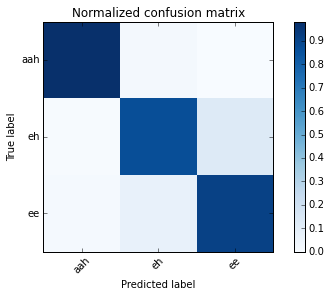

In [11]:
cm = confusion_matrix(y, y_pred)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
plot_confusion_matrix(cm_normalized, title='Normalized confusion matrix')

In [12]:
cm

array([[165,   3,   0],
       [  1, 141,  20],
       [  2,  11, 137]])

to megan: add coordinates of goal. sort them. 0 corresponds to the lowest addition "ah", 1 is "eh" 

In [13]:
sio.savemat("s"+str(subnum)+"12_pred.mat", {"y_pred": y_pred})

##### Define a decision tree

WHOOPS... I just realized that I chose my training/testing in order... since these are ordered sequentially... there's a bias... should probably choose them randomly :( Megan: how did you choose?

In [14]:
print X.shape
print len(y)
#save 25% for testing
print len(y)*.75
X_train = X[:360,:]
y_train_answers = y[:360]
X_test = X[360:,:]
y_test_answers = y[360:]

(480, 2)
480
360.0


In [15]:
tree_clf = tree.DecisionTreeClassifier()
tree_clf = tree_clf.fit(X[:360,:],y[:360])

In [16]:
from sklearn.externals.six import StringIO
with open("graph.dot",'w') as f:
    f=tree.export_graphviz(tree_clf, out_file=f)

In [17]:
from sklearn.externals.six import StringIO
import pydot
dot_data = StringIO()
tree.export_graphviz(tree_clf, out_file=dot_data)
graph = pydot.graph_from_dot_data(dot_data.getvalue())
graph.write_pdf("graph.pdf")

True

In [18]:
trained_results = tree_clf.predict(X[:360,:])
tested_results = tree_clf.predict(X[360:,:])

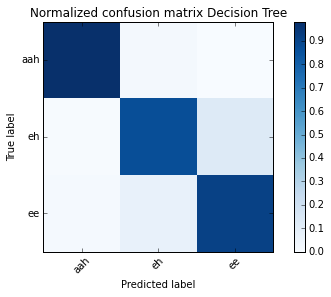

In [19]:
cm_tree = confusion_matrix(y[360:], tested_results)
cm_normalized_tree = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
plot_confusion_matrix(cm_normalized_tree, title='Normalized confusion matrix Decision Tree')

PLOT THE TRAINING DATA

915.104167 2291.041667
215.555556 865.185185


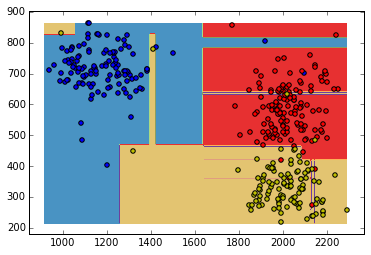

In [20]:
#plot the decision boundary
plot_step = 5
plot_colors = "bry"
n_classes = 3
x_min, x_max = X[:,0].min(), X[:,0].max()
y_min, y_max = X[:,1].min(), X[:,1].max()
print x_min, x_max
print y_min, y_max
xx,yy = np.meshgrid(np.arange(x_min, x_max, plot_step), np.arange(y_min, y_max, plot_step))
Z = tree_clf.predict(np.c_[xx.ravel(),yy.ravel()])
Z=Z.reshape(xx.shape)
cs = plt.contourf(xx,yy,Z, cmap=plt.cm.Paired)
for i, color in zip(range(n_classes), plot_colors):
    idx = np.where(trained_results == i)
    plt.scatter(X_train[idx, 0], X_train[idx, 1], c=color, cmap=plt.cm.Paired)
plt.show()

PLOT THE TESTING DATA

915.104167 2291.041667
215.555556 865.185185


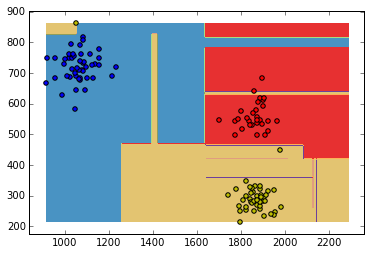

In [21]:
#plot the decision boundary
plot_step = 5
plot_colors = "bry"
n_classes = 3
x_min, x_max = X[:,0].min(), X[:,0].max()
y_min, y_max = X[:,1].min(), X[:,1].max()
print x_min, x_max
print y_min, y_max
xx,yy = np.meshgrid(np.arange(x_min, x_max, plot_step), np.arange(y_min, y_max, plot_step))
Z = tree_clf.predict(np.c_[xx.ravel(),yy.ravel()])
Z=Z.reshape(xx.shape)
cs = plt.contourf(xx,yy,Z, cmap=plt.cm.Paired)
for i, color in zip(range(n_classes), plot_colors):
    idx = np.where(tested_results == i)
    plt.scatter(X_test[idx, 0], X_test[idx, 1], c=color, cmap=plt.cm.Paired)
plt.show()